In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [264]:
df = pd.read_csv('Salary_Data.csv')

In [265]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [267]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [268]:
df.shape

(30, 2)

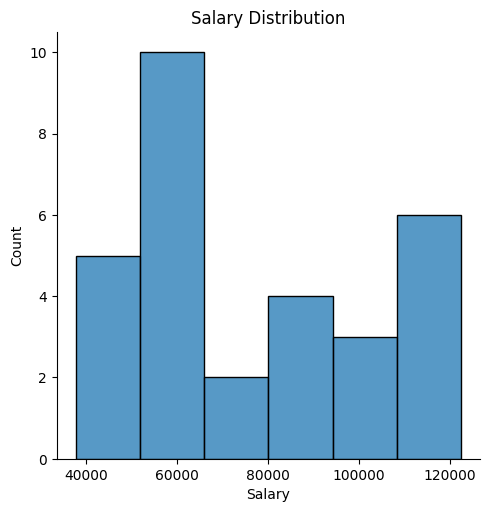

In [269]:
sns.displot(df['Salary'])
plt.title('Salary Distribution')
plt.show()

In [270]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

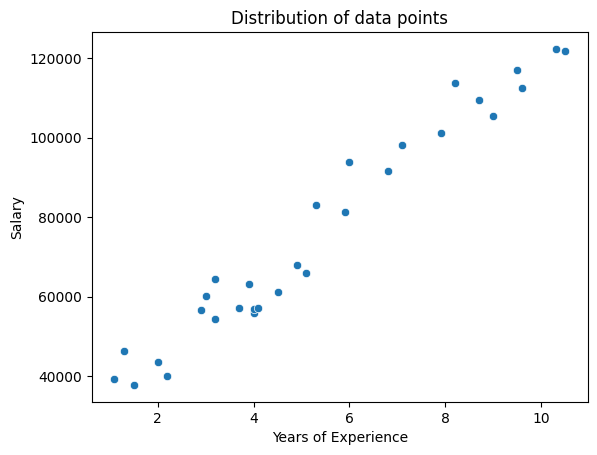

In [271]:
sns.scatterplot(x=df['YearsExperience'], y=df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Distribution of data points')
plt.show()

In [272]:
x = df.drop('Salary', axis=1)
y = df['Salary']

In [273]:
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [274]:
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [275]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [276]:
x_train.shape,y_train.shape

((22, 1), (22,))

In [277]:
x_test.shape,y_test.shape

((8, 1), (8,))

In [278]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [279]:
model1.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [280]:
y_pred_test = model1.predict(x_test)
y_pred_train = model1.predict(x_train)

In [281]:
print(y_pred_test)

[115439.88180109  71396.10622651 102320.45928951  75144.51265839
  55465.37889103  60150.88693088 121999.59305688 107005.96732936]


In [282]:
print(y_pred_train)

[ 62962.19175479  35786.24512367  46094.36281133  73270.30944245
  52654.07406712  63899.29336276  62962.19175479  99509.1544656
  37660.44833961  39534.65155555 109817.27215327  44220.15959539
  92012.34160185 114502.78019312  80767.12230621 123873.79627281
  89201.03677794  55465.37889103  62025.09014682  67647.69979464
  81704.22391418  53591.17567509]


In [283]:
from sklearn.metrics import r2_score

In [284]:
print("Test score ", r2_score(y_test,y_pred_test))
print("Train score ", r2_score(y_train, y_pred_train))

Test score  0.9347210011126782
Train score  0.9553880313075513


In [285]:
test_error = y_test - y_pred_test
train_error = y_train - y_pred_train

In [286]:
test_error

27    -2804.881801
15    -3458.106227
23    11491.540710
17     7943.487342
8      8979.621109
9     -2961.886931
28      391.406943
24     2425.032671
Name: Salary, dtype: float64

In [287]:
train_error

12    -6005.191755
0      3556.754876
4     -6203.362811
16    -7241.309442
5      3987.925933
13    -6818.293363
11    -7168.191755
22     1792.845534
1      8544.551660
2     -1803.651556
25    -4235.272153
3      -695.159595
21     6260.658398
26     2466.219807
18      595.877694
29    -2001.796273
20     2536.963222
7     -1020.378891
10     1192.909853
14    -6536.699795
19    12235.776086
6      6558.824325
Name: Salary, dtype: float64

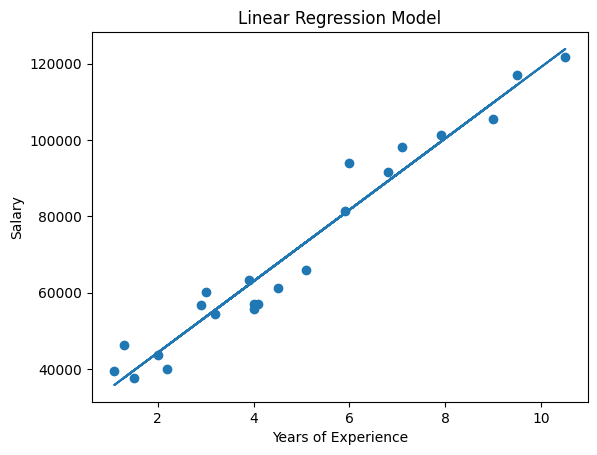

In [288]:
plt.scatter(x_train, y_train)
plt.plot(x_train,y_pred_train)
plt.xlabel("Years of Experience")
plt.ylabel('Salary')
plt.title('Linear Regression Model')
plt.show()

In [289]:
model1.coef_

array([9371.0160797])

In [290]:
model1.intercept_

np.float64(25478.12743600038)

In [291]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(x_train, y_train)
y_pred_test = model2.predict(x_test)
y_pred_train = model2.predict(x_train)
test_error = (y_test - y_pred_test)
train_error = y_train - y_pred_train
print(test_error)
print(train_error)

27    -3155.210113
15    -3560.278095
23    11215.131339
17     7820.195776
8      8967.207955
9     -3000.699707
Name: Salary, dtype: float64
28        4.119161
24     2122.223678
12    -6059.844304
0      3655.220133
4     -6162.976722
16    -7354.041159
5      3991.352551
13    -6878.225836
11    -7222.844304
22     1532.275936
1      8632.457068
2     -1726.305996
25    -4553.920919
3      -644.213658
21     6042.328195
26     2121.171419
18      440.906582
29    -2399.643904
20     2334.472792
7     -1032.792045
10     1143.537228
14    -6617.751965
19    12075.525050
6      6556.971019
Name: Salary, dtype: float64


In [292]:
print("Test score ", r2_score(y_test,y_pred_test))
print("Train score ", r2_score(y_train, y_pred_train))

Test score  0.9024461774180497
Train score  0.9645401573418146


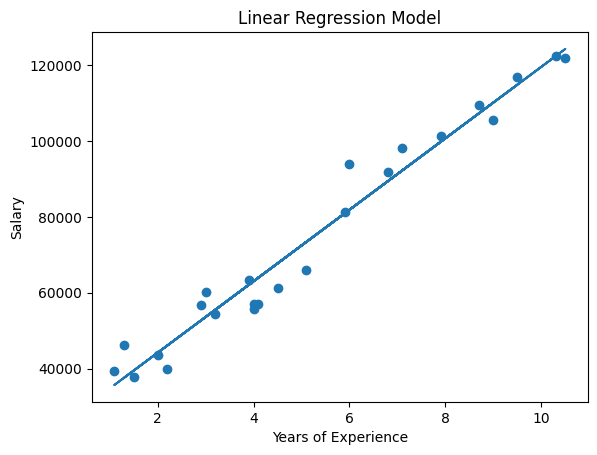

In [293]:
plt.scatter(x_train, y_train)
plt.plot(x_train,y_pred_train)
plt.xlabel("Years of Experience")
plt.ylabel('Salary')
plt.title('Linear Regression Model')
plt.show()

In [294]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()
model3.fit(x_train, y_train)
y_pred_test = model3.predict(x_test)
y_pred_train = model3.predict(x_train)
test_error = (y_test - y_pred_test)
train_error = y_train - y_pred_train
print(test_error)
print(train_error)

27    -2804.881801
15    -3458.106227
23    11491.540710
17     7943.487342
8      8979.621109
9     -2961.886931
28      391.406943
24     2425.032671
Name: Salary, dtype: float64
12    -6005.191755
0      3556.754876
4     -6203.362811
16    -7241.309442
5      3987.925933
13    -6818.293363
11    -7168.191755
22     1792.845534
1      8544.551660
2     -1803.651556
25    -4235.272153
3      -695.159595
21     6260.658398
26     2466.219807
18      595.877694
29    -2001.796273
20     2536.963222
7     -1020.378891
10     1192.909853
14    -6536.699795
19    12235.776086
6      6558.824325
Name: Salary, dtype: float64


In [295]:
print("Test score ", r2_score(y_test,y_pred_test))
print("Train score ", r2_score(y_train, y_pred_train))

Test score  0.9347210011126782
Train score  0.9553880313075513


### We are choosing model 1 as it the best it performs well on the Test as well as Train Data